In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook
with open('Chexpert_Train_DenseNet121_Complete.npy', 'rb') as f:
    X_train_0 = np.load(f)
    y_train_0 = np.load(f)
    data_dict = np.load(f,allow_pickle=True).item()
    
    
print(data_dict.keys())

filename = np.array(data_dict['filename'])
patient_id = data_dict['patient_id']
sex = data_dict['sex']
age = data_dict['age']
view = data_dict['view']

X_train = X_train_0
y_train = y_train_0

N = len(filename)

print(X_train.shape, y_train.shape)

dict_keys(['filename', 'patient_id', 'sex', 'age', 'view'])
(223414, 1024) (223414, 14)


In [3]:
diseases = ['No Finding', #0
            'Enlarged Cardiomediastinum', #1
            'Cardiomegaly', #2
            'Lung Opacity', #3
            'Lung Lesion', #4
            'Edema', #5
            'Consolidation', #6
            'Pneumonia', #7
            'Atelectasis', #8
            'Pneumothorax', #9
            'Pleural Effusion', #10
            'Pleural Other', #11
            'Fracture', #12
            'Support Devices' #13
            ]

classes = ['Absent', 'Present', 'Uncertain', 'Not Mentioned']

In [4]:
from sklearn.model_selection import train_test_split 

#X_train, X_test, y_train, y_test = train_test_split(X_train_0, 
#                                                    y_train_0, 
#                                                    test_size=0.2, 
#                                                    random_state = 31415) 

print(y_train.shape)
print(X_train.shape)

(223414, 14)
(223414, 1024)


In [ ]:
import umap 
 
    
import matplotlib.pyplot as plt
#%matplotlib inline
    
np.random.seed(100) 
ump = umap.UMAP(n_neighbors=10, 
        min_dist=0.001, #used in paper 0.001
        #spread = ,
        n_components=2, 
        random_state=150, 
        n_epochs = 300,
        metric= 'euclidean') 
 
y_umap = ump.fit_transform(X_train) 
 
plt.figure() 
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train[:,0], s=0.01, cmap='Spectral') 
 
#cbar = plt.colorbar(boundaries=np.arange(3)-0.5) 
#cbar.set_ticks(np.arange(3)) 
#cbar.set_ticklabels(classes) 

In [ ]:
#y_view = 

print(np.unique(view))

#print(np.array(view)=='AP')
y_viewAP = 2 * (np.array(view)=='AP')
y_viewL1 = 1 * (np.array(view)=='LL')
y_viewL2 = 1 * (np.array(view)=='RL')
y_viewL3 = 1 * (np.array(view)=='LATERAL')

y_view = y_viewAP + y_viewL1 + y_viewL2 + y_viewL3
#'''
#%matplotlib inline

plt.figure() 
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_view, s=0.01, cmap='jet') 
 
cbar = plt.colorbar(boundaries=np.arange(4)-0.5) 
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(['PA', 'L', 'AP'])
#'''

In [ ]:
for i in range(len(diseases)):
    plt.figure() 
    plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train[:,i], s=0.01, cmap='Spectral') 

    cbar = plt.colorbar(boundaries=np.arange(len(classes)+1)-0.5) 
    cbar.set_ticks(np.arange(len(classes))) 
    cbar.set_ticklabels(classes)
    plt.title(diseases[i])

In [18]:
#pneumonia Statistics
labels = y_train[:,7]

print('Absent: ', np.sum(labels==0))
print('Present: ', np.sum(labels==1))
print('Uncertain: ', np.sum(labels==2))
print('Not Mentioned: ', np.sum(labels==3))

Absent:  2799
Present:  6039
Uncertain:  18770
Not Mentioned:  195806


<IPython.core.display.Javascript object>


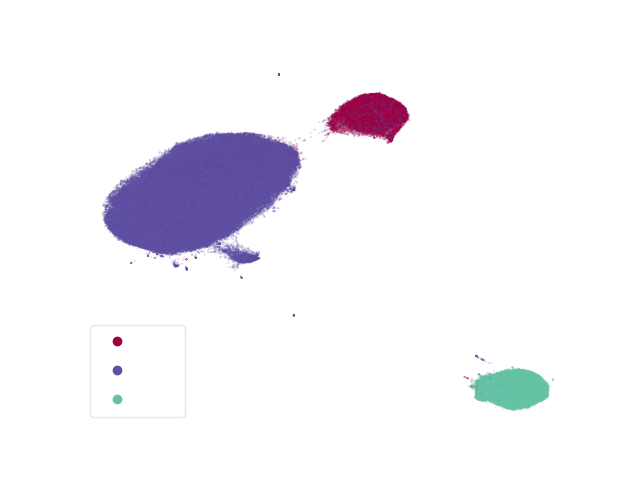

In [20]:
#%matplotlib inline
import matplotlib
from matplotlib.colors import ListedColormap
i = 7

def rotate_matrix(y_in, theta):
    tht = theta*np.pi/180
    R = np.array( [[np.cos(tht), -np.sin(tht)], [np.sin(tht), np.cos(tht)]] )
    y_out = R.dot(y_in.T).T
    return y_out

plt.figure() 

y_umap2 = rotate_matrix(y_umap, -55)

cmap = matplotlib.cm.get_cmap('Spectral')
first_color = cmap(0.0)
third_color = cmap(1.0)
second_color = cmap(0.8)

cmap2 = ListedColormap(np.array([first_color, second_color, third_color]))

#plt.scatter(y_umap[stub_labels,0], y_umap[stub_labels,1], c=y_train[stub_labels,i], s=1)
scatter = plt.scatter(y_umap2[:,0], y_umap2[:,1], c=y_view, s=0.01, cmap=cmap2) 

handles, labels = scatter.legend_elements()
handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[1], labels[2]]

lgd = plt.legend(handles, labels,
                    loc="lower left", prop={'size': 14})
lgd.get_texts()[0].set_text('    ') #PA
lgd.get_texts()[1].set_text('    ') #AP
lgd.get_texts()[2].set_text('    ') #L
lgd.get_frame().set_alpha(None)
lgd.get_frame().set_facecolor((0, 0, 1, 0))
lgd.get_frame().set_edgecolor((0,0,0,0.1))


plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.savefig('Chexpert_Fig2/chexpert2_colored.tif', dpi=1200, transparent=True)

#cbar = plt.colorbar(boundaries=np.arange(len(classes))-0.5) 
#cbar.set_ticks(np.arange(len(classes)+1)) 
#cbar.set_ticklabels(classes)
#plt.title(diseases[i])

In [23]:
#x=[6.143,6.557],y=[3.502,3.817]

#x=[11.569,11.833]
#y=[-0.068,0.192]

#[1.4688451 1.7627897]

In [24]:
from imageio import imread 

def get_indexes_within(y_umap,x,y):
    xmin = x[0]
    xmax = x[1]
    ymin = y[0]
    ymax = y[1]
    
    idx1 = (y_umap[:,0] > xmin) & (y_umap[:,0] < xmax)
    idx2 = (y_umap[:,1] > ymin) & (y_umap[:,1] < ymax)
    
    idx = idx1 & idx2
    
    return idx
    
def load_images_from_fnames(fnames):
    imgs = []
    for i in range(len(fnames)):
        img = imread('CHEXPERT/'+fnames[i], as_gray=False, pilmode="RGB") 
        imgs.append(img)
        
    return imgs

In [25]:
from imageio import imread 

def plot_within_region(y_umap,filename,x,y,no_of_plots=4,npseed=100, labels=None, 
                       save_to_txt=None, idxs2=None, printNames=False):

    idxs = get_indexes_within(y_umap,x=x, y=y)

    fnames = filename[idxs]
    sub_y_umap = y_umap[idxs]
    if labels is not None:
        sub_labels = labels[idxs]
        print(sub_labels)
        
    if save_to_txt is not None:
        fn = open(save_to_txt,'w')
        for l in fnames:
            fn.write(l+'\n')

    print('Total number of points in this region: ', len(fnames))

    if printNames:
        for i in range(len(fnames)):
            print(i, fnames[i])
    #print(np.sum(idxs==True), len(filename))
    #print(len(fnames), fnames)

    #images = load_images_from_fnames(fnames)
    #print(len(images))

    imgs_to_plot = 10
    if idxs2 is None:
        np.random.seed(npseed)
        idxs2 = np.random.choice(len(fnames), no_of_plots, replace=False)

    print(idxs2)

    plt.figure()

    k = 0
    for i in range(2):
        for j in range(int(no_of_plots/2)):
            plt.subplot(2,int(no_of_plots/2),k+1)
            img = imread('CHEXPERT/'+fnames[idxs2[k]], as_gray=False, pilmode="RGB") 
            plt.imshow(img)
            plt.axis('off')
            
            
            print(sub_y_umap[idxs2[k]])
            print('CHEXPERT/'+fnames[idxs2[k]])
            
            k = k + 1
        
        

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


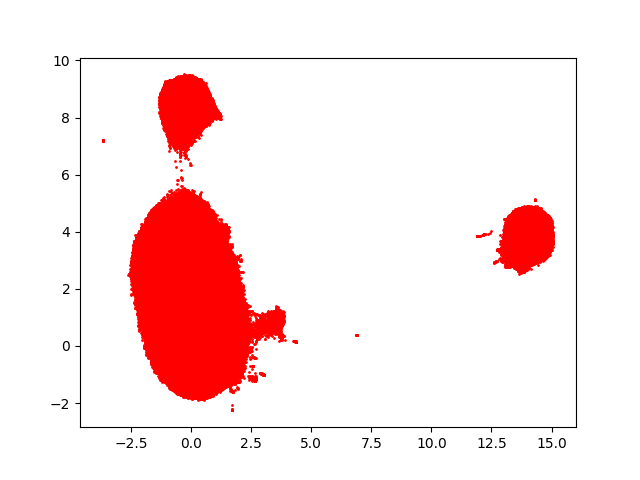

Total number of points in this region:  50
[ 6 36 37 28]


<IPython.core.display.Javascript object>


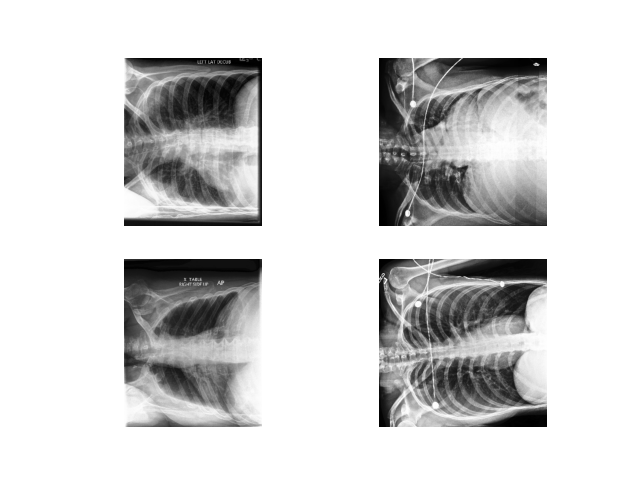

[11.920673  3.852335]
CHEXPERT/CheXpert-v1.0-small/train/patient07732/study4/view2_frontal.jpg
[11.90521   3.856996]
CHEXPERT/CheXpert-v1.0-small/train/patient29680/study1/view2_frontal.jpg
[11.945621   3.8565295]
CHEXPERT/CheXpert-v1.0-small/train/patient31419/study2/view2_frontal.jpg
[11.906627   3.8569574]
CHEXPERT/CheXpert-v1.0-small/train/patient24240/study1/view1_frontal.jpg


In [26]:
plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 


plot_within_region(y_umap,filename,x=[11.5,12.5],y=[3.5,4.5])
plt.savefig('Chexpert_Fig2/chexpert2_g.svg', dpi=400, transparent=True)

In [ ]:
plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 

#plt.xlim([10,16])
#plt.ylim([5,5.25])
plot_within_region(y_umap,filename,x=[13,15],y=[5,5.25])
plt.savefig('Chexpert_Fig2/chexpert2_h.svg', dpi=400, transparent=True)

In [ ]:
plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 

plot_within_region(y_umap,filename,x=[13,15],y=[3,5])
plt.savefig('Chexpert_Fig2/chexpert2_f.svg', dpi=400, transparent=True)

In [ ]:
plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 

plot_within_region(y_umap,filename,x=[12.65,12.8],y=[3.25,3.75], no_of_plots=4)

#put a pin on it

In [ ]:
plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 

plot_within_region(y_umap,filename,x=[12.5,12.8],y=[2.75,3.125], no_of_plots=4, printNames=True)

plt.savefig('Chexpert_Extra_Fig/chexpert3_a.svg', dpi=400, transparent=True)

<IPython.core.display.Javascript object>


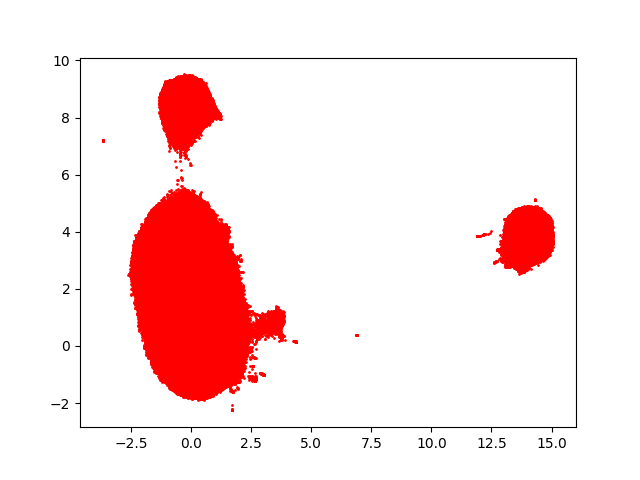

Total number of points in this region:  88
[80 57 76 28]


<IPython.core.display.Javascript object>


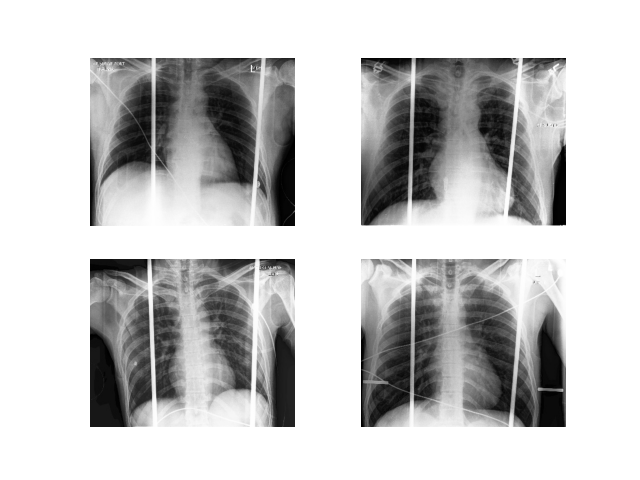

[-3.688796   7.2117734]
CHEXPERT/CheXpert-v1.0-small/train/patient58487/study1/view1_frontal.jpg
[-3.688277   7.2117004]
CHEXPERT/CheXpert-v1.0-small/train/patient38517/study1/view1_frontal.jpg
[-3.6750407  7.2043624]
CHEXPERT/CheXpert-v1.0-small/train/patient53723/study1/view1_frontal.jpg
[-3.6845887  7.210345 ]
CHEXPERT/CheXpert-v1.0-small/train/patient13652/study1/view1_frontal.jpg


In [43]:
plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [-4,-3.5]
y_reg = [7,7.3]

#plt.xlim(x_reg)
#plt.ylim(y_reg)

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4, save_to_txt='filename_horizontal_artifacts.txt')

plt.savefig('Chexpert_Extra_Fig/chexpert3_b.svg', dpi=400, transparent=True)

In [ ]:
plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [1.5,2.0]
y_reg = [-2.5,-2.0]

#plt.xlim(x_reg)
#plt.ylim(y_reg)

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4, printNames=True)

#all 11 plots are of same patient

plt.savefig('Chexpert_Extra_Fig/chexpert3_e.svg', dpi=400, transparent=True)

<IPython.core.display.Javascript object>


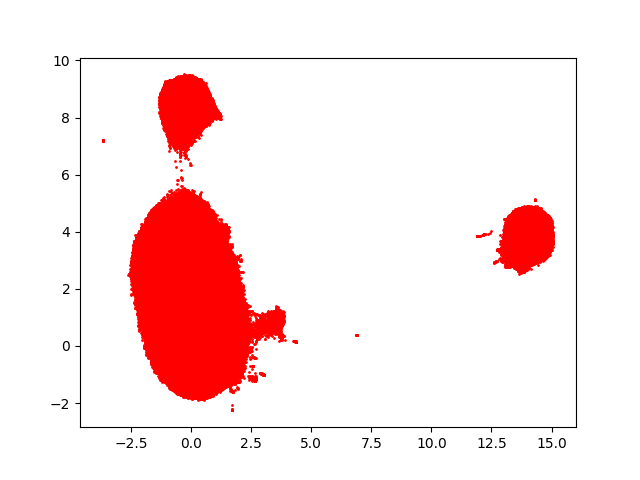

[2 2 2 2 2 2 0 2 2 1 1 2 2 1 2 2 2 2 2]
Total number of points in this region:  19
[ 7 12 18  2]


<IPython.core.display.Javascript object>


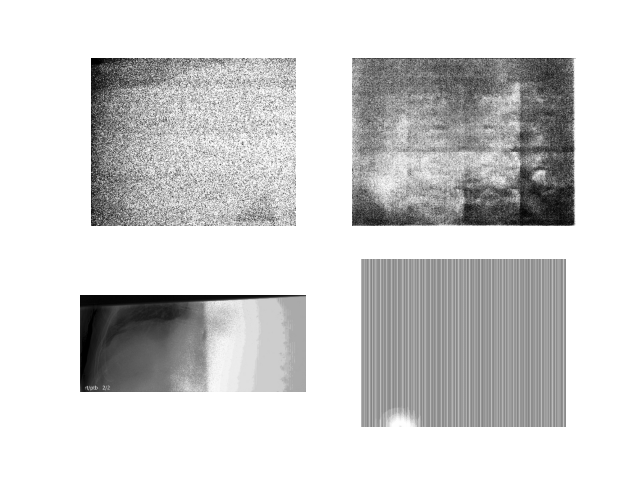

[4.3421545  0.15574762]
CHEXPERT/CheXpert-v1.0-small/train/patient23121/study4/view2_frontal.jpg
[4.318105   0.16983312]
CHEXPERT/CheXpert-v1.0-small/train/patient33492/study1/view2_frontal.jpg
[4.288003   0.17098998]
CHEXPERT/CheXpert-v1.0-small/train/patient51430/study1/view1_frontal.jpg
[4.340319   0.15483482]
CHEXPERT/CheXpert-v1.0-small/train/patient07366/study15/view1_frontal.jpg


In [45]:
#%matplotlib inline

plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [4.0,4.5]
y_reg = [0.1,0.3]

#plt.xlim(x_reg)
#plt.ylim(y_reg)

idxs = np.array([ 7, 12,  18,  2])

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4, npseed=114, 
                   labels=y_view, save_to_txt='complete_names_non_x-_ray.txt', idxs2=idxs)


plt.savefig('Chexpert_Fig2/chexpert2_c.svg', dpi=400, transparent=True)

In [ ]:
#%matplotlib inline

plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=.1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [2.8, 3.2]
y_reg = [-1.05,-0.9]

#plt.xlim(x_reg)
#plt.ylim(y_reg)

#plt.show()

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4, npseed=400)

#all 11 plots are of same patient

plt.savefig('Chexpert_Extra_Fig/chexpert3_c.svg', dpi=400, transparent=True)

<IPython.core.display.Javascript object>


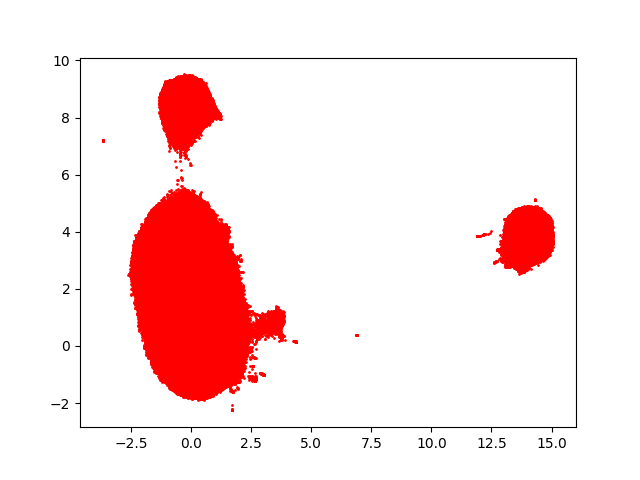

Total number of points in this region:  107
[41 29 36 28]


<IPython.core.display.Javascript object>


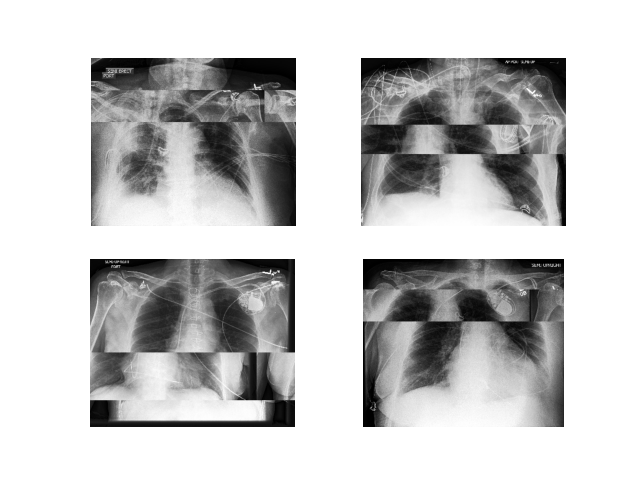

[ 2.5886614 -1.2027693]
CHEXPERT/CheXpert-v1.0-small/train/patient29994/study4/view1_frontal.jpg
[ 2.4942365 -1.1319752]
CHEXPERT/CheXpert-v1.0-small/train/patient23028/study1/view1_frontal.jpg
[ 2.452122  -1.0672197]
CHEXPERT/CheXpert-v1.0-small/train/patient26703/study15/view1_frontal.jpg
[ 2.635885  -1.2121745]
CHEXPERT/CheXpert-v1.0-small/train/patient22770/study2/view1_frontal.jpg


In [47]:
#%matplotlib inline

plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [2.35, 2.8]
y_reg = [-1.25,-1.01]

#plt.xlim(x_reg)
#plt.ylim(y_reg)

#plt.show()

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4)

plt.savefig('Chexpert_Fig2/chexpert2_e.svg', dpi=400, transparent=True)

In [ ]:
#%matplotlib inline

plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=.1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [2.5, 4.0]
y_reg = [-0,2.0]

plt.xlim(x_reg)
plt.ylim(y_reg)

#plt.show()

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4)

#all 11 plots are of same patient



In [ ]:
#%matplotlib inline

plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=.1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [1.6, 1.8]
y_reg = [-1.75,-1.5]

#plt.xlim(x_reg)
#plt.ylim(y_reg)

#plt.show()

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4)

#all 11 plots are of same patient

In [ ]:
#%matplotlib inline

plt.figure() 

plt.scatter(y_umap[:,0], y_umap[:,1], c='r', alpha=1, s=.1, cmap='jet') 
#plt.xlim([np.min(y_umap[:,0])-2, np.max(y_umap[:,0])+2])
#stub_labels = y_train[:,i] == 1

x_reg = [1.6, 1.8]
y_reg = [-1.75,-1.5]

#plt.xlim(x_reg)
#plt.ylim(y_reg)

#plt.show()

plot_within_region(y_umap,filename,x=x_reg, y=y_reg, no_of_plots=4)

#all 11 plots are of same patient